In [34]:
# std
import os
import sys
import re

# 3rd party
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [35]:
def get_path(filename, dirname=None):
    root = os.path.dirname(os.getcwd())
    path = os.path.join(root, dirname, filename) if dirname else os.path.join(root, filename)

    return path

In [36]:
path = get_path('rntn_train_validate_and_test_wordnet_baseline.csv', 'results')
path

'/Users/luyolomagangane/workspace/deep-knowledge-modelling/results/rntn_train_validate_and_test_wordnet_baseline.csv'

In [37]:
results_baseline = pd.read_csv(path)
results_baseline.head()

,cost_training,cost_validation,cost_test
0,150237.140625,7878.121094,31809.474609
1,134341.593750,7802.993164,31494.505859
2,124111.351562,7742.378418,31240.869141
3,117083.093750,7698.704102,31055.728516
4,111444.000000,7660.360840,30888.564453


In [38]:
results_baseline = results_baseline.reset_index()
results_baseline.head()

,index,cost_training,cost_validation,cost_test
0,0,150237.140625,7878.121094,31809.474609
1,1,134341.593750,7802.993164,31494.505859
2,2,124111.351562,7742.378418,31240.869141
3,3,117083.093750,7698.704102,31055.728516
4,4,111444.000000,7660.360840,30888.564453


In [39]:
results_baseline = results_baseline.rename(columns={'index': 'epoch'})
results_baseline.head()

,epoch,cost_training,cost_validation,cost_test
0,0,150237.140625,7878.121094,31809.474609
1,1,134341.593750,7802.993164,31494.505859
2,2,124111.351562,7742.378418,31240.869141
3,3,117083.093750,7698.704102,31055.728516
4,4,111444.000000,7660.360840,30888.564453


In [40]:
results_baseline['epoch'] += 1
results_baseline.head()

,epoch,cost_training,cost_validation,cost_test
0,1,150237.140625,7878.121094,31809.474609
1,2,134341.593750,7802.993164,31494.505859
2,3,124111.351562,7742.378418,31240.869141
3,4,117083.093750,7698.704102,31055.728516
4,5,111444.000000,7660.360840,30888.564453


In [41]:
del results_baseline['cost_test']
results_baseline.head()

,epoch,cost_training,cost_validation
0,1,150237.140625,7878.121094
1,2,134341.593750,7802.993164
2,3,124111.351562,7742.378418
3,4,117083.093750,7698.704102
4,5,111444.000000,7660.360840


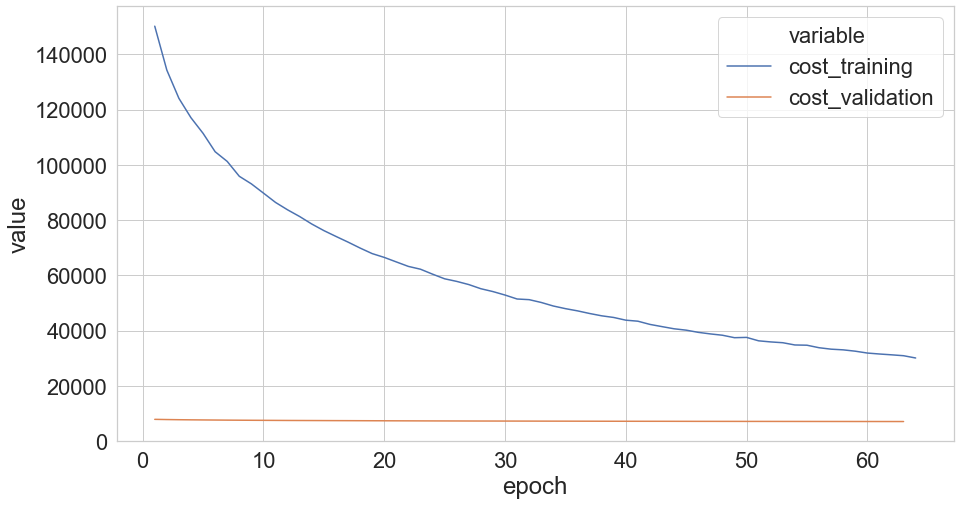

In [42]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_baseline, ['epoch']))

In [43]:
path = get_path('rntn_train_validate_and_test_wordnet_experiment.csv', 'results')
path

'/Users/luyolomagangane/workspace/deep-knowledge-modelling/results/rntn_train_validate_and_test_wordnet_experiment.csv'

In [44]:
results_experiment = pd.read_csv(path)
results_experiment.head()

,cost_training,cost_validation,cost_test
0,2113.146729,4979.330078,20205.656250
1,1341.437378,8379.241211,33910.527344
2,995.285461,7257.853516,29306.863281
3,944.283264,5706.655273,22706.216797
4,865.563354,5906.799805,23574.556641


In [45]:
results_experiment = results_experiment.reset_index()
results_experiment.head()

,index,cost_training,cost_validation,cost_test
0,0,2113.146729,4979.330078,20205.656250
1,1,1341.437378,8379.241211,33910.527344
2,2,995.285461,7257.853516,29306.863281
3,3,944.283264,5706.655273,22706.216797
4,4,865.563354,5906.799805,23574.556641


In [46]:
results_experiment = results_experiment.rename(columns={'index': 'epoch'})
results_experiment.head()

,epoch,cost_training,cost_validation,cost_test
0,0,2113.146729,4979.330078,20205.656250
1,1,1341.437378,8379.241211,33910.527344
2,2,995.285461,7257.853516,29306.863281
3,3,944.283264,5706.655273,22706.216797
4,4,865.563354,5906.799805,23574.556641


In [47]:
results_experiment['epoch'] += 1
results_experiment.head()

,epoch,cost_training,cost_validation,cost_test
0,1,2113.146729,4979.330078,20205.656250
1,2,1341.437378,8379.241211,33910.527344
2,3,995.285461,7257.853516,29306.863281
3,4,944.283264,5706.655273,22706.216797
4,5,865.563354,5906.799805,23574.556641


In [48]:
del results_experiment['cost_test']
results_experiment.head()

,epoch,cost_training,cost_validation
0,1,2113.146729,4979.330078
1,2,1341.437378,8379.241211
2,3,995.285461,7257.853516
3,4,944.283264,5706.655273
4,5,865.563354,5906.799805


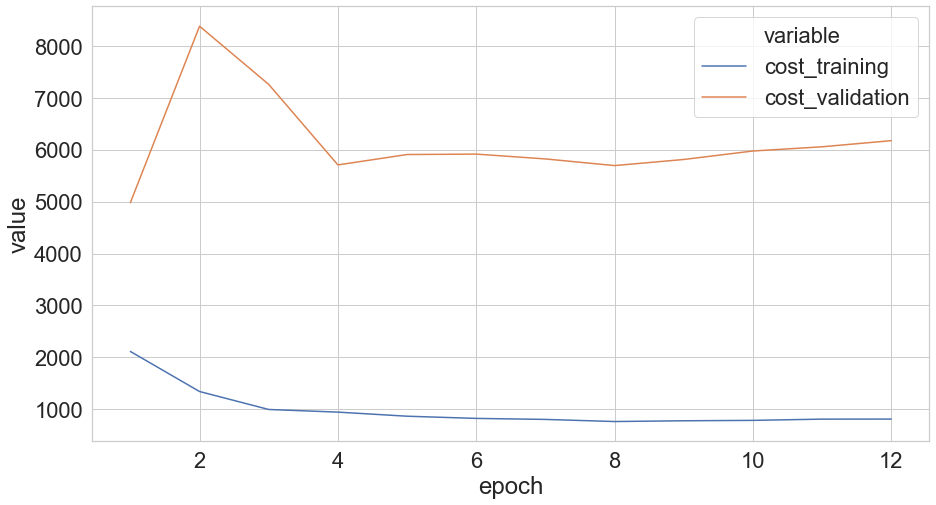

In [49]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_experiment, ['epoch']))

In [51]:
results_cost = results_baseline
results_cost.head()

,epoch,cost_training,cost_validation
0,1,150237.140625,7878.121094
1,2,134341.593750,7802.993164
2,3,124111.351562,7742.378418
3,4,117083.093750,7698.704102
4,5,111444.000000,7660.360840


In [54]:
results_cost = results_cost.rename(columns={'cost_training': 'cost_training_baseline', 'cost_validation': 'cost_validation_baseline'})
results_cost.head(20)

,epoch,cost_training_baseline,cost_validation_baseline
0,1,150237.140625,7878.121094
1,2,134341.593750,7802.993164
2,3,124111.351562,7742.378418
3,4,117083.093750,7698.704102
4,5,111444.000000,7660.360840
5,6,104782.539062,7625.056641
6,7,101270.046875,7591.177734
7,8,95891.234375,7564.873535
8,9,93143.148438,7539.914062
9,10,89801.195312,7517.852539


In [55]:
results_cost['cost_training_experiment'] =  results_experiment['cost_training']
results_cost.head(20)

,epoch,cost_training_baseline,cost_validation_baseline,cost_training_experiment
0,1,150237.140625,7878.121094,2113.146729
1,2,134341.593750,7802.993164,1341.437378
2,3,124111.351562,7742.378418,995.285461
3,4,117083.093750,7698.704102,944.283264
4,5,111444.000000,7660.360840,865.563354
5,6,104782.539062,7625.056641,823.214722
6,7,101270.046875,7591.177734,803.763428
7,8,95891.234375,7564.873535,763.016296
8,9,93143.148438,7539.914062,777.626953
9,10,89801.195312,7517.852539,785.411621


In [56]:
results_cost['cost_validation_experiment'] =  results_experiment['cost_validation']
results_cost.head(20)

,epoch,cost_training_baseline,cost_validation_baseline,cost_training_experiment,cost_validation_experiment
0,1,150237.140625,7878.121094,2113.146729,4979.330078
1,2,134341.593750,7802.993164,1341.437378,8379.241211
2,3,124111.351562,7742.378418,995.285461,7257.853516
3,4,117083.093750,7698.704102,944.283264,5706.655273
4,5,111444.000000,7660.360840,865.563354,5906.799805
5,6,104782.539062,7625.056641,823.214722,5914.956543
6,7,101270.046875,7591.177734,803.763428,5822.086914
7,8,95891.234375,7564.873535,763.016296,5693.600586
8,9,93143.148438,7539.914062,777.626953,5811.300293
9,10,89801.195312,7517.852539,785.411621,5974.753906


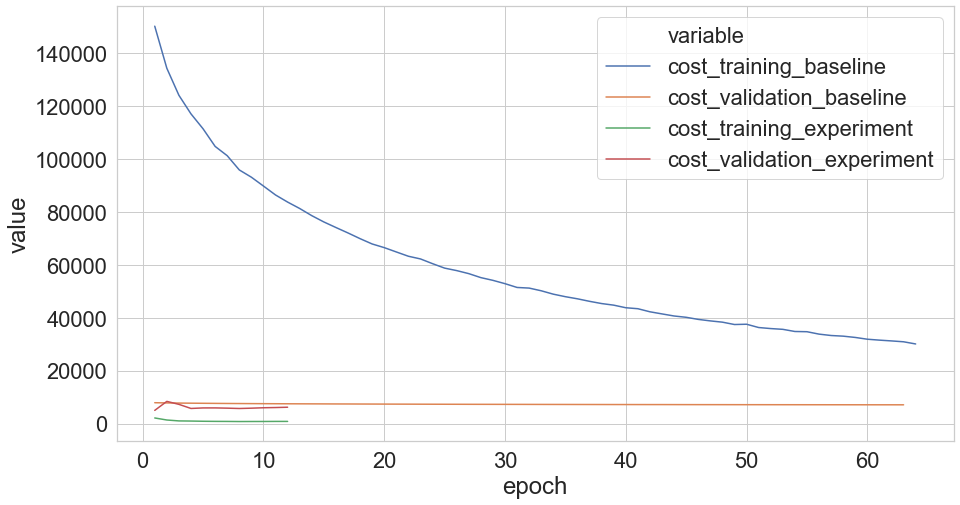

In [58]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2) 
sns.set_style("whitegrid")
ax = sns.lineplot(x='epoch', y='value', hue='variable', data=pd.melt(results_cost, ['epoch']))
plt.savefig('Wordnet_Cost_Results.png', bbox_inches = "tight", format='PNG')